# Classifying the image 


# Step to create model :-

In [1]:
# import important packge 

import tensorflow as tf 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.layers import Conv2D,MaxPooling2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.utils import plot_model
import matplotlib.pyplot as plt 
import numpy as np 
# import pandas as pd 
import os 
import glob2 as gb
import cv2 

In [2]:
# the path of the image in traning model 
train_path = 'E:\\chess\\'

# Check and recognize data

In [6]:
# this step to know the number of image 


for folder in os.listdir(train_path):
    files = gb.glob(pathname=str(train_path)+folder+'/*jpg')
    print(f'for trainig data , found {len(files)} in folder {folder}')

for trainig data , found 0 in folder 1 - Copy (15).jpg
for trainig data , found 0 in folder 2 - Copy (2).jpg
for trainig data , found 56 in folder BB
for trainig data , found 63 in folder BK
for trainig data , found 46 in folder BKn
for trainig data , found 55 in folder BP
for trainig data , found 60 in folder BQ
for trainig data , found 46 in folder BR
for trainig data , found 54 in folder empty
for trainig data , found 58 in folder WB
for trainig data , found 56 in folder WK
for trainig data , found 58 in folder WKn
for trainig data , found 40 in folder WP
for trainig data , found 48 in folder WQ
for trainig data , found 49 in folder WR


In [4]:
# this function i will used it later in reading image and model predict 

code = {'BB':0,'BK':1,'BKn':2,'BP':3,'BQ':4,'BR':5,'WB':6,'WK':7,
       'WKn':8,'WP':9,'WQ':10,'WR':11 , 'empty':12}

def get_code(n):
    for x , y in code.items():
        if n ==y:
            return x
        


# Preprocessing for images 


In [30]:
# create the traning data 
 

x = []
y = []

for folder in os.listdir(train_path):
    files = gb.glob(pathname=str(train_path) + folder + '/*jpg')
    for file in files :
        image = cv2.imread(file)
#         image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
        if image is not None :
            image_array = cv2.resize(image,(150,150))
            x.append(list(image_array))
            y.append(code[folder])


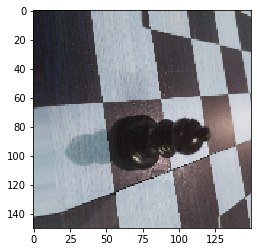

In [31]:
# plt.imshow(x[0] , cmap='gray')
plt.imshow(x[0] )

<class 'list'> <class 'list'>
(150, 150, 3)
shape of x_train[5] :  (150, 150, 3)
x_train shape : (689, 150, 150, 3)
y_train shape : (689,)
BB


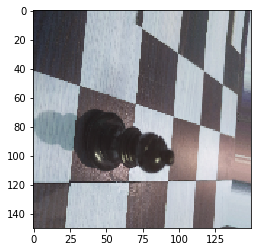

In [32]:
# convert the traning data from list to array 

print(type(x),type(y))

X = np.asarray(x)
Y = np.asarray(y)

# plt.imshow(X[1] , cmap='gray')
plt.imshow(X[1] )
print(X[0].shape)
# print('shape of x_train :', x_train.shape())
print('shape of x_train[5] : ', X[5].shape)
#print('any image contain : x_train[0] \n',x_train[0])
print('x_train shape :' , X.shape)
print('y_train shape :' , Y.shape)
print(get_code(Y[1]))

In [33]:
# normalize the x from 0 to 1 instead of 0 to 255

X = X/255.0
print('sample x_tra[0] : \n ' ,X[0])

sample x_tra[0] : 
  [[[0.12156863 0.11764706 0.15686275]
  [0.12156863 0.11764706 0.15686275]
  [0.1254902  0.12156863 0.16078431]
  ...
  [0.70980392 0.74901961 0.77647059]
  [0.69803922 0.74117647 0.77254902]
  [0.38431373 0.41568627 0.44313725]]

 [[0.12156863 0.11764706 0.15686275]
  [0.12156863 0.11764706 0.15686275]
  [0.10980392 0.10588235 0.14509804]
  ...
  [0.70588235 0.74117647 0.77647059]
  [0.70196078 0.74117647 0.77254902]
  [0.57254902 0.60784314 0.64313725]]

 [[0.12156863 0.11764706 0.15686275]
  [0.12156863 0.11764706 0.15686275]
  [0.1254902  0.12156863 0.16078431]
  ...
  [0.70588235 0.7372549  0.76470588]
  [0.70588235 0.74117647 0.77254902]
  [0.6627451  0.69803922 0.73333333]]

 ...

 [[0.23137255 0.22352941 0.25882353]
  [0.24313725 0.22745098 0.2627451 ]
  [0.24313725 0.23921569 0.27058824]
  ...
  [0.30196078 0.2627451  0.28627451]
  [0.29803922 0.26666667 0.27058824]
  [0.75686275 0.77254902 0.79215686]]

 [[0.23921569 0.22745098 0.23529412]
  [0.25490196 0.

In [34]:
# convert y to one hot encoding ' it's necessary for our model '

Y = to_categorical(Y)
print(Y[0])

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [35]:
# cangtulration abdo  ^_^ finally create our model  
model = Sequential()
model.add(Conv2D(64,kernel_size = 3 , activation = 'relu',input_shape = (150,150,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32,kernel_size = 3 , activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(13,activation='softmax'))

In [36]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 32)        18464     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 41472)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 13)                539149    
Total params: 559,405
Trainable params: 559,405
Non-trainable params: 0
________________________________________________

In [37]:
# compile our model 
model_compile = model.compile(tf.keras.optimizers.SGD(lr = 0.001),loss = 'categorical_crossentropy',metrics=['accuracy'])

In [21]:
# x = np.expand_dims(X, -1)


In [38]:
# fit or train our model 
model_details = model.fit(X,Y,epochs=90,batch_size=64 , verbose=1)

Train on 689 samples
Epoch 1/90
689/689 [==============================] - 29s 42ms/sample - loss: 2.5716 - accuracy: 0.1147
Epoch 2/90
689/689 [==============================] - 32s 46ms/sample - loss: 2.5545 - accuracy: 0.1669
Epoch 3/90
689/689 [==============================] - 32s 46ms/sample - loss: 2.5420 - accuracy: 0.1509
Epoch 4/90
689/689 [==============================] - 30s 44ms/sample - loss: 2.5318 - accuracy: 0.1422
Epoch 5/90
689/689 [==============================] - 31s 46ms/sample - loss: 2.5216 - accuracy: 0.1567
Epoch 6/90
689/689 [==============================] - 29s 43ms/sample - loss: 2.5129 - accuracy: 0.1611
Epoch 7/90
689/689 [==============================] - 33s 48ms/sample - loss: 2.5039 - accuracy: 0.1901
Epoch 8/90
689/689 [==============================] - 38s 55ms/sample - loss: 2.4931 - accuracy: 0.2235
Epoch 9/90
689/689 [==============================] - 42s 61ms/sample - loss: 2.4824 - accuracy: 0.2453
Epoch 10/90
689/689 [======================

In [39]:
y_pred   = model.predict(X)

In [43]:
# X[0].shape

(150, 150, 3)

# visualize the model 

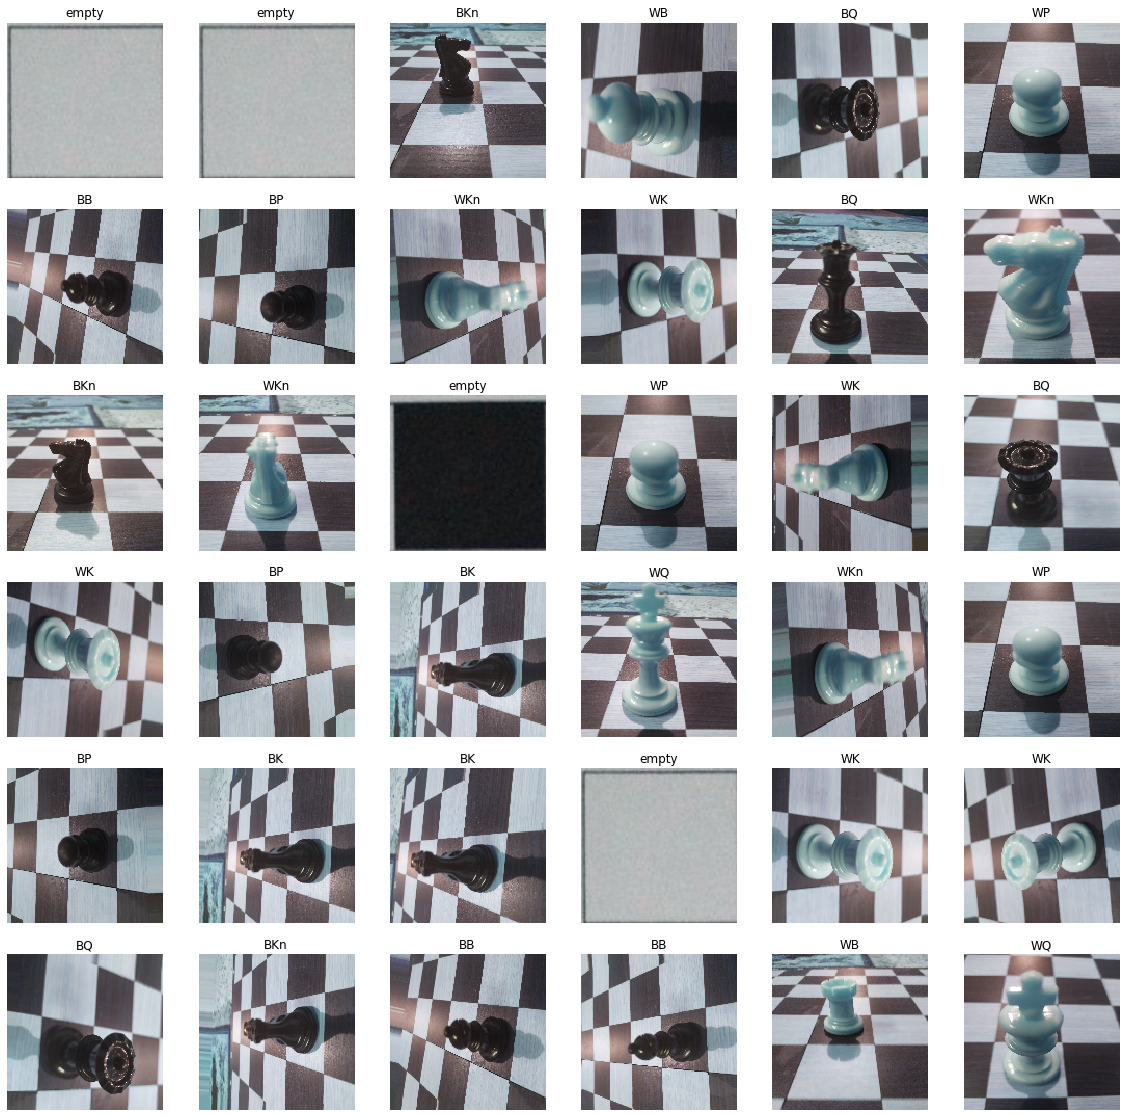

In [41]:
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(y_pred),36))):
    plt.subplot(6,6,n+1)
#     plt.imshow(X[i] , cmap='gray')
    plt.imshow(X[i])
    plt.axis('off')
    plt.title(get_code(np.argmax(y_pred[i])))

In [42]:
model.save('chess_proj.h5')
print('done')

done


(150, 150)

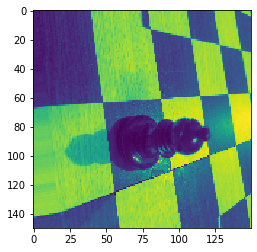

In [27]:
abdo = X[0]
plt.imshow(abdo)
abdo.shape

In [55]:
abdo=np.expand_dims(abdo, -1)
# ahmed = model.predict(abdo)
abdo.shape

(150, 150, 1)

In [71]:
yi=x[0]
# plt.imshow(yi,cmap='gray')
# yi.shape
aa = model.predict(x[0:1])

In [72]:
aa

array([[9.1053534e-01, 9.0161990e-04, 1.6824466e-03, 6.0011413e-02,
        1.4153374e-02, 7.0206146e-03, 1.6433983e-03, 3.9801959e-04,
        4.2740057e-06, 2.9423425e-04, 6.5648503e-04, 2.6987970e-03]],
      dtype=float32)